# Creación de neurona artificial para ETH


In [21]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

print("TensorFlow version:", tf.__version__)
print("Verion 1.0.0 del algoritmo")

TensorFlow version: 2.20.0
Verion 1.0.0 del algoritmo


## Descargar datos de Ethereum

In [22]:
# Descargar datos históricos de Ethereum
eth = yf.download('ETH-USD', start='2020-01-01', end='2025-10-20')

# Mostrar las primeras filas
print(eth.head())
print("\nForma de los datos:", eth.shape)

C:\Users\raton\AppData\Local\Temp\ipykernel_24920\3822267417.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  eth = yf.download('ETH-USD', start='2020-01-01', end='2025-10-20')
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open       Volume
Ticker         ETH-USD     ETH-USD     ETH-USD     ETH-USD      ETH-USD
Date                                                                   
2020-01-01  130.802002  132.835358  129.198288  129.630661   7935230330
2020-01-02  127.410179  130.820038  126.954910  130.820038   8032709256
2020-01-03  134.171707  134.554016  126.490021  127.411263  10476845358
2020-01-04  135.069366  136.052719  133.040558  134.168518   7430904515
2020-01-05  136.276779  139.410202  135.045624  135.072098   7526675353

Forma de los datos: (2119, 5)


## Preprocesamiento de datos

In [23]:
# Usaremos solo el precio de cierre
data = eth[['Close']].values

# Normalizar los datos entre 0 y 1
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Crear secuencias para entrenamiento
def create_sequences(data, sequence_length=10):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:(i + sequence_length), 0])
        y.append(data[i + sequence_length, 0])
    return np.array(X), np.array(y)

sequence_length = 10
X, y = create_sequences(data_scaled, sequence_length)

print(f"Forma de X: {X.shape}")
print(f"Forma de y: {y.shape}")

Forma de X: (2109, 10)
Forma de y: (2109,)


## Definir la estructura de una sola neurona

In [24]:
# UNA SOLA NEURONA usando TensorFlow
class SingleNeuron:
    def __init__(self, input_dim):
        # Inicializar pesos y sesgo (bias)
        self.W = tf.Variable(tf.random.normal([input_dim, 1], stddev=0.1), name='weights')
        self.b = tf.Variable(tf.zeros([1]), name='bias')

    def __call__(self, x):
        # Forward pass: y = Wx + b
        return tf.matmul(x, self.W) + self.b

    def get_weights(self):
        return self.W.numpy(), self.b.numpy()

# Crear la neurona
neurona = SingleNeuron(input_dim=sequence_length)
print("Neurona creada exitosamente!")
print(f"Pesos iniciales: {neurona.get_weights()[0].flatten()}")
print(f"Sesgo inicial: {neurona.get_weights()[1]}")

Neurona creada exitosamente!
Pesos iniciales: [-0.00323748  0.02179729 -0.14080523 -0.10627617 -0.1236391  -0.15381604
  0.23568593  0.01270707  0.15914252  0.19362748]
Sesgo inicial: [0.]


## Función de pérdida y optimizador

In [25]:
# Función de pérdida (Error Cuadrático Medio)
def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Optimizador (Descenso de Gradiente)
optimizer = tf.optimizers.Adam(learning_rate=0.001)

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(f"Datos de entrenamiento: {X_train.shape}")
print(f"Datos de prueba: {X_test.shape}")

Datos de entrenamiento: (1687, 10)
Datos de prueba: (422, 10)


## Entrenamiento de la neurona

In [26]:
# Historial de pérdidas
train_losses = []
test_losses = []

# Entrenamiento
epochs = 2000
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        # Forward pass
        y_pred = neurona(X_train.astype(np.float32))
        loss = loss_fn(y_train.astype(np.float32), y_pred)

    # Backward pass
    gradients = tape.gradient(loss, [neurona.W, neurona.b])
    optimizer.apply_gradients(zip(gradients, [neurona.W, neurona.b]))

    # Calcular pérdida en test
    y_test_pred = neurona(X_test.astype(np.float32))
    test_loss = loss_fn(y_test.astype(np.float32), y_test_pred)

    train_losses.append(loss.numpy())
    test_losses.append(test_loss.numpy())

    if epoch % 20 == 0:
        print(f"Época {epoch}: Pérdida entrenamiento = {loss.numpy():.6f}, Pérdida prueba = {test_loss.numpy():.6f}")

print("\n¡Entrenamiento completado!")

Época 0: Pérdida entrenamiento = 0.179753, Pérdida prueba = 0.327963
Época 20: Pérdida entrenamiento = 0.127868, Pérdida prueba = 0.200333
Época 40: Pérdida entrenamiento = 0.101145, Pérdida prueba = 0.124613
Época 60: Pérdida entrenamiento = 0.091398, Pérdida prueba = 0.089333
Época 80: Pérdida entrenamiento = 0.088383, Pérdida prueba = 0.076048
Época 100: Pérdida entrenamiento = 0.086742, Pérdida prueba = 0.072158
Época 120: Pérdida entrenamiento = 0.085166, Pérdida prueba = 0.071644
Época 140: Pérdida entrenamiento = 0.083566, Pérdida prueba = 0.071925
Época 160: Pérdida entrenamiento = 0.081973, Pérdida prueba = 0.072140
Época 180: Pérdida entrenamiento = 0.080404, Pérdida prueba = 0.072215
Época 200: Pérdida entrenamiento = 0.078873, Pérdida prueba = 0.072259
Época 220: Pérdida entrenamiento = 0.077391, Pérdida prueba = 0.072331
Época 240: Pérdida entrenamiento = 0.075967, Pérdida prueba = 0.072434
Época 260: Pérdida entrenamiento = 0.074606, Pérdida prueba = 0.072563
Época 280: P

## Visualización del entrenamiento

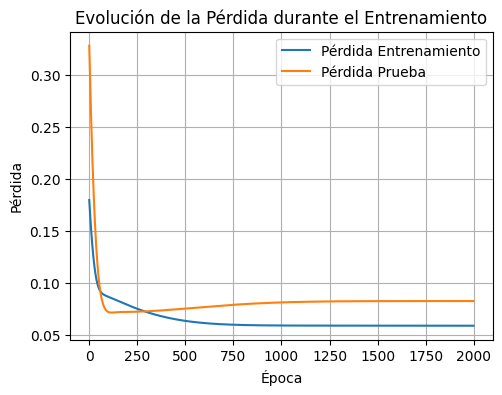

In [27]:
plt.figure(figsize=(12, 4))

# Gráfico de pérdidas
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Pérdida Entrenamiento')
plt.plot(test_losses, label='Pérdida Prueba')
plt.title('Evolución de la Pérdida durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)

# Predicciones

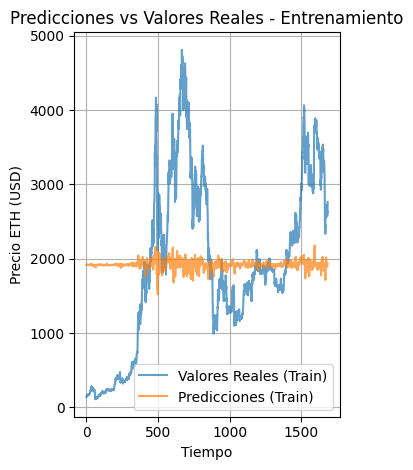

In [28]:
# Hacer predicciones
y_pred_train = neurona(X_train.astype(np.float32))
y_pred_test = neurona(X_test.astype(np.float32))

# Desnormalizar las predicciones
y_pred_train_actual = scaler.inverse_transform(y_pred_train.numpy())
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))

# Gráfico de predicciones vs valores reales
plt.subplot(1, 2, 2)
plt.plot(y_train_actual, label='Valores Reales (Train)', alpha=0.7)
plt.plot(y_pred_train_actual, label='Predicciones (Train)', alpha=0.7)
plt.title('Predicciones vs Valores Reales - Entrenamiento')
plt.xlabel('Tiempo')
plt.ylabel('Precio ETH (USD)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Predicción del siguiente precio

In [29]:
# Usar los últimos 'sequence_length' días para predecir el siguiente
ultimos_datos = data_scaled[-sequence_length:].flatten().reshape(1, -1)

# Hacer la predicción
prediccion_normalizada = neurona(ultimos_datos.astype(np.float32))
prediccion = scaler.inverse_transform(prediccion_normalizada.numpy())

print(f"\n=== PREDICCIÓN DE LA NEURONA ===")
print(f"Último precio real: ${data[-1][0]:.2f}")
print(f"Predicción del siguiente precio: ${prediccion[0][0]:.2f}")
print(f"Pesos finales de la neurona: {neurona.get_weights()[0].flatten()}")
print(f"Sesgo final: {neurona.get_weights()[1][0]:.6f}")


=== PREDICCIÓN DE LA NEURONA ===
Último precio real: $3984.65
Predicción del siguiente precio: $1826.62
Pesos finales de la neurona: [ 0.0235085   0.04814655 -0.11424208 -0.08613158 -0.11367317 -0.16000941
  0.20426196 -0.03077487  0.10202651  0.12916018]
Sesgo final: 0.382262


# Evaluación del modelo

In [30]:
# Calcular métricas de error
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred_test_actual = scaler.inverse_transform(y_pred_test.numpy())

mae = mean_absolute_error(y_test_actual, y_pred_test_actual)
mse = mean_squared_error(y_test_actual, y_pred_test_actual)
rmse = np.sqrt(mse)

print(f"\n=== MÉTRICAS DE EVALUACIÓN ===")
print(f"Error Absoluto Medio (MAE): ${mae:.2f}")
print(f"Error Cuadrático Medio (MSE): ${mse:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): ${rmse:.2f}")


=== MÉTRICAS DE EVALUACIÓN ===
Error Absoluto Medio (MAE): $1100.78
Error Cuadrático Medio (MSE): $1821634.24
Raíz del Error Cuadrático Medio (RMSE): $1349.68
